# Tasks 2020
Task submissions for October - December 2020
***


### Task 1
Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values
*** 
* For this task I write a function `counts` which takes a list as an argument
* There are a number of possible methods which add lists to dictionaries, such as using list comrehensions as well and through the importation of modules (`collections` module) amongst others. This blog post at geesforgeeks.org details some of these [1]
* I found the simplest and most useful solution on stackoverflow.com which I demonstrate below [2]. This method is also suggested at kite.com [3] <br>
<br>

##### Function description
* Inside the `counts` function I create an empty dictionary `d`
* Next I use a `for` loop to iterate over the list, adding a list-item to the dictionary on each iteration
* Inside the `for` loop I use conditional statements to determine whether a new key-value pair should be added to the dictionary. If the key exists already, its corresponding value increases by 1
* When the `for` loop ends, the dictionary containing the list items is returned
* Finally, I call the function and print the returned dictionary to the console
<br>





<br>

### References

[1] geeksforgeeks.com; Python | Ways to create a dictionary of Lists; https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/ <br>
[2] stackoverflow.com; How to add list elements into dictionary https://stackoverflow.com/questions/30208044/how-to-add-list-elements-into-dictionary<br>
[3] kite.com; How to append an element to a key in a dictionary with Python; https://www.kite.com/python/answers/how-to-append-an-element-to-a-key-in-a-dictionary-with-python <br>

<br>

***


**Function code**

In [1]:
# create a simple list of 5 elements
l = ['A', 'A', 'B', 'C', 'A']

In [2]:
'''
This function takes a list as an argument and adds list items to a dictionary
'''

def counts(lst):
    # empy dictionary d initialised 
    d = {}
    # iterate through list items and add to dict d
    for item in lst:
        if item in d:
            d[item] += 1
        else:
            d[item] = 1
    return d

In [3]:
# call function and print to console
print(counts(l))

{'A': 3, 'B': 1, 'C': 1}


#### End task 1
***
<br>

<br>

### Task 2
Write a Python function called `dicerolls()` that simulates rolling dice. Your function should take two parameters: the number of dice *k* and the number of times to roll the dice *n*. The function should simulate randomly rolling *k* dice *n* times, keeping track of each total face value.  It should then return a dictionary with the number of times each possible total face value occurred.
***
* As requested by the task, the function takes two parameters: k (no. of dice) and n (no. of rolls). 
* I have used nested for loops to carry out the simulation. I have based the algorithm used on useful information about nested loops at w3schools.com [1]. 
* The outer loop simulates the number of times the dice are rolled while the inner loop simulates the number of dice.
* To simulate a random roll of a single die, I use the `integers()` function from `numpy.random` package.
* On every iteration of the outer loop (n dice rolls), the inner loop runs k times (no. of dice)
* The results of each iteration of the inner loop are appended to list l (initialised as an empty list within the function)
* I use the function from Task 1 (above) to add each list item to dictionary d (initialised as an empty dictionary within the function)
* The function returns a sorted dictionary. I found the code for this on a discussion on stackoverflow.com [2]
* I call the `dicerolls()` 4 times. First with 2 dice, then 3, 4 and 5. The dice are rolled 100,000 times on each functon call. 
<br>

##### Plotting the output
* I plot the output of each function call on a separate bar charts. To plot a dictionary on a bar chart, I used code found on a stackoverflow.com discussion [3].
* I used the matplotlib documentation to plot 4 subplots on a single figure [4].
* From observation of the bar charts, it is clear that the results are normally distributed, with the curve becoming increasingly rounded the more dice are thrown.





<br>

### References
[1] w3schools; Python Nested Loops; https://www.w3schools.com/python/gloss_python_for_nested.asp <br>
[2] https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key%22 <br>
[3] https://stackoverflow.com/questions/21195179/plot-a-histogram-from-a-dictionary <br>
[4] Pyplot tutorial; intro to pyplot; https://matplotlib.org/tutorials/introductory/pyplot.html<br>

<br>

#### Build function and run simulation

In [4]:
# import default_rng for random number generation, matplotlib.pyplot for visualisation
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [5]:
# construct a new Generator object
rng = default_rng()

In [6]:
'''
This function simulates the rolling of k=int dice, n=int times
'''

def dicerolls(k, n):
    l = [] # initialise empty list
    d = {} # initialise empty dict
    for roll in range(n): # outer loop simulates no. of times dice are rolled
        dice_sum = 0 # dice_sum counter set to 0
        for die in range(k): # inner loop simulates each of k dice thrown at random
            dice = rng.integers(1, 7)
            dice_sum += dice # face value of each dice added together
        l.append(dice_sum) 
    d = counts(l) # function from Task 1 called
    return dict(sorted(d.items()))

In [7]:
# 2 dice rolled 100,000 times and dictionary output
two_dice = dicerolls(2, 100000)
two_dice

{2: 2727,
 3: 5509,
 4: 8330,
 5: 11066,
 6: 13735,
 7: 16857,
 8: 13858,
 9: 11066,
 10: 8474,
 11: 5583,
 12: 2795}

<br>

#### Plot output: Different values for k (number of dice)

Text(0.5, 1.0, '5 dice')

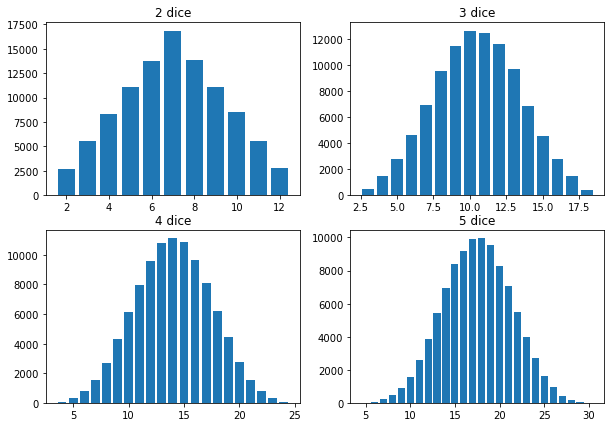

In [8]:
# plot 4 subplots on a single figure for better visualisation comparison
plt.figure(figsize=(10, 7))

# plot bar chart for 2 dice rolled
plt.subplot(221)
plt.bar(list(two_dice.keys()), two_dice.values())
plt.title('2 dice')

# plot bar chart for 3 dice rolled
three_dice = dicerolls(3, 100000)
plt.subplot(222)
plt.bar(list(three_dice.keys()), three_dice.values())
plt.title('3 dice')

# plot bar chart for 4 dice rolled
four_dice = dicerolls(4, 100000)
plt.subplot(223)
plt.bar(list(four_dice.keys()), four_dice.values())
plt.title('4 dice')

# plot bar chart for 5 dice rolled
five_dice = dicerolls(5, 100000)
plt.subplot(224)
plt.bar(list(five_dice.keys()), five_dice.values())
plt.title('5 dice')

##### Note the increased roundedness of the curve the more dice are thrown. All 4 have the appearance of a normal distribution.

<br>

#### End task 2
***

<br>



### Task 3

Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the  number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve. Use the `numpy.random.binomial` function to generate the simulation.

* To demonstrate the binomial distribution in practical terms, the coin toss example is often used [1], [2], [3]. 
* The coin toss is also an example of a Bernoulli trial. This is a single trial from which there are exactly two possible outcomes, usually denoted as 'success' or 'failure'. [4]
* When we toss a fair coin, there are only two possible outcomes - heads or tails - and each outcome has an equal probability (p=0.5) of arising. 
* If we say that 'heads' denotes a 'success', we can perform the coin toss n number of times, counting the number of successes we observe. This number will have a binomial distribution.
* Using rng.binomial below, I simulate the coin toss and plot the resulting distribution on a histogram. The bell shaped curve is evident.
* There are 100 trials (n=100), with a 50% probability of success (p=0.5). This is performed 1,000 times.

<br>

### References
[1] Hamel, Greg; Python for Data 22: Probability Distributions; https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions <br>
[2] onlinestatsbook.com; Binomial Distribution; http://onlinestatbook.com/2/probability/binomial.html <br>
[3] Wikipedia; Bernoulli Trial; https://en.wikipedia.org/wiki/Bernoulli_trial<br>
[4] *Ibid* <br>

In [9]:
# construct a new Generator object
rng = default_rng()

In [10]:
n, p = 100, .5  # number of trials, probability of each trial
unbiased_coin = rng.binomial(n, p, 10000) # result of tossing a coin 10 times, tested 1000 times.

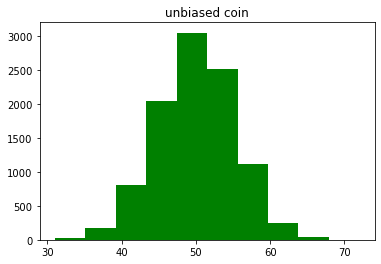

In [11]:
plt.hist(unbiased_coin, color='green')
plt.title("unbiased coin")
plt.show()

This has the appearance of a normal distribution (explored below). If the probability of success is changed however (i.e. we add a bias to the coin), we observe a change in the shape of the distribution - it becomes asymmetrical:

In [12]:
n, p = 100, .9  # number of trials, probability of success
biased_coin = rng.binomial(n, p, 10000) # result of tossing a coin 10 times, tested 10000 times.

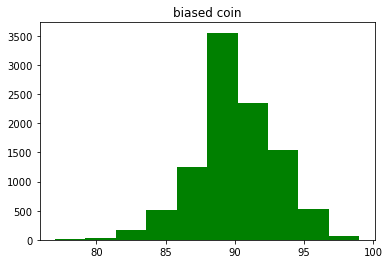

In [13]:
plt.hist(biased_coin, color='green')
plt.title("biased coin")
plt.show()

#### End task 3
***


<br>



### Task 4

Use numpy to create four data sets, each with an `x` array and  a  corresponding `y` array,  to  demonstrate  Simpson’s  paradox. You might create  your `x` arrays using `numpy.linspace` and  create  the `y` array  for  each `x` using notation like `y = a * x + b` where you choose the `a` and `b` for each `x`, `y` pair to demonstrate the paradox. You might see the Wikipedia page for Simpson’s paradox for inspiration.

<br>



Simpson's Paradox is a phenomenon in statistics whereby seemingly contradictory trends are observed within the same data set, depending on how the data set is analysed. For example, the data may be split into four smaller groups and within each of these groups, a positive trend is observed. However when taken in aggregate, the overall trend is seen to be negative [1].

<br>

In order to demonstrate this phenomenon I have generated four data sets below, using `numpy.linspace`. I then plot these data sets on a graph for visualisation. 


[1] wikipedia.org; Simpson's Paradox; https://en.wikipedia.org/wiki/Simpson%27s_paradox <br>

<br>



First, I import `numpy` and `matplotlib.pylot` for data set generation and subsequent visualisation respectively:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

<br>



Next, I generate four data sets of equal sample size (20). The coordinates for the x values and the corresponding y values have been intentionally chosen to so that each individual data set will show a positive trend. When plotted on a graph (below), Simpson's paradox can be visualised and thus understood intuitively. There are many examples of such visualisations which guided the selection of values for my data sets [2], [3], [4]. The `linspace` function generates the x array while the corresponding y array is populated using the formula `a * x + b` as suggested in the task brief. I have added the function `numpy.radnom.randn` to the formula in order to closer simulate the random nature of reality. I use code found on a discussion on stackoverflow.com for this [5].

<br>


[2] Kievit, R. A.; Simpson's Paradox in Psychological Science: A Practical Guide; https://www.researchgate.net/figure/Alcohol-use-and-intelligence-Simulated-data-illustrating-that-despite-a-positive_fig2_256074671 <br>
[3] stackexchange.com; Examples of Simpson's Paradox being resolved by choosing the aggregate data; https://stats.stackexchange.com/questions/478463/examples-of-simpsons-paradox-being-resolved-by-choosing-the-aggregate-data <br>
[4] wikipedia.org; Simpson's Paradox; https://en.wikipedia.org/wiki/Simpson%27s_paradox <br>
[5] stackoverflow.com; Linear regression minimizing errors only above the linear; https://stackoverflow.com/questions/58090204/linear-regression-minimizing-errors-only-above-the-linear <br>

In [85]:
# Assign values for a and b
a = 1
b = 20

# Generate an x array using the numpy.linspace function
x = np.linspace(3, 7, 20)

# Calculate corresponding y values
y = a * x + b + np.random.randn(*x.shape)

In [86]:
b = 15

x2 = np.linspace(5, 12, 20)
y2 = a * x + b + np.random.randn(*x2.shape)

In [82]:
b = 10

x3 = np.linspace(7, 17, 20)
y3 = a * x + b + np.random.randn(*x3.shape)

In [83]:
b = 5

x4 = np.linspace(9, 22, 20)
y4 = a * x + b + np.random.randn(*x4.shape)

<br>



When we visualise the data on a scatter plot, we observe a positive trend in each of the four data sets separately, while there is a clearly observable negative trend in the overall relationship between the variables if we take the data in aggregate. To plot each data set on the same graph, I used code found in a discussion on stackoverflow.com [6].

<br>

### References
[6] stackoverflow.com; MatPlotLib: Multiple datasets on the same scatter plot; https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot <br>

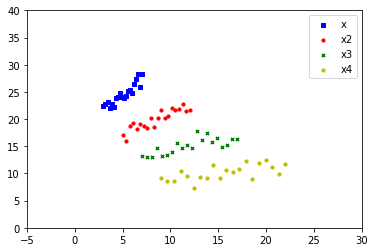

In [96]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='x')
ax1.scatter(x2 ,y2 , s=10, c='r', marker="o", label='x2')
ax1.scatter(x3, y3, s=10, c='g', marker="x", label='x3')
ax1.scatter(x4 ,y4 , s=10, c='y', marker="o", label='x4')
plt.xlim(-5, 30)
plt.ylim(0, 40)
plt.legend(loc='upper right');
plt.show()